In [23]:
from podpac.datalib import nexrad
from podpac import Coordinates, crange, clinspace
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Get Available Radars


In [25]:
coords = Coordinates([crange('2018-01-02 01:33:11', '2018-01-04 06:43:21', '1,D')], dims=['time'])
radars = nexrad.get_radars(coords)
# radars

## Nexrad DataSource

In [3]:
node = nexrad.NexradSource(source='KABR20100101_001550_V03.gz')

In [4]:
node.native_coordinates

2010/01/01/KABR/KABR20100101_001550_V03.gz


Coordinates
	lat_lon[lat]: ArrayCoordinates1d(lat): Bounds[41.326177935269186, 49.58548834082003], N[7254720], ctype['point']
	lat_lon[lon]: ArrayCoordinates1d(lon): Bounds[-104.30536019212853, -92.52020199539581], N[7254720], ctype['point']
	time: ArrayCoordinates1d(time): Bounds[2010-01-01T00:15:50.000000, 2010-01-01T00:15:50.000000], N[1], ctype['point']

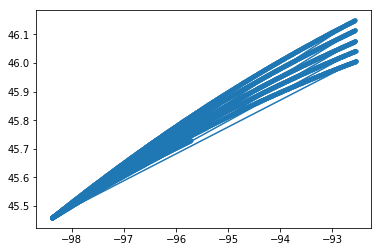

In [22]:
lat = node.radar.gate_latitude['data']
lon = node.radar.gate_longitude['data']

plt.figure()
plt.plot(lon.ravel()[0:10000], lat.ravel()[0:10000], marker='.')

In [39]:
node.radar.ngates

1832

In [47]:
radar = node.radar

In [56]:
radar.nsweeps

7

In [58]:
sweep = radar.extract_sweeps([0])

In [60]:
sweep.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([0.48339844], dtype=float32)}

In [62]:
sweep.ngates

1832

In [63]:
sweep.nrays

720

In [94]:
sweep.range

{'units': 'meters',
 'standard_name': 'projection_range_coordinate',
 'long_name': 'range_to_measurement_volume',
 'axis': 'radial_range_coordinate',
 'spacing_is_constant': 'true',
 'comment': 'Coordinate variable for range. Range to center of each bin.',
 'data': array([  2125.,   2375.,   2625., ..., 459375., 459625., 459875.],
       dtype=float32),
 'meters_to_center_of_first_gate': 2125.0,
 'meters_between_gates': 250.0}

In [ ]:
lat = sweep.gate_latitude['data']
lon = sweep.gate_longitude['data']

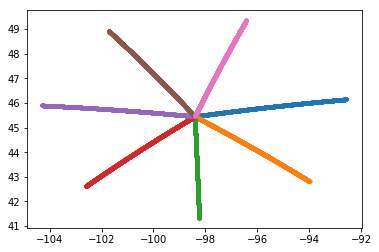

In [88]:

# plot rays
plt.figure()
for i in range(0, 700, 100):
    plt.plot(lon[i], lat[i], marker='.')
    
pass

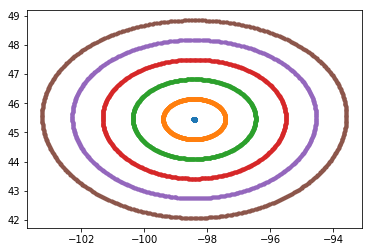

In [91]:
# plot angles
plt.figure()
for i in range(0, 1800, 300):
    plt.plot(lon[:,i], lat[:,i], marker='.')

pass

In [8]:
node = nexrad.Nexrad()

In [ ]:
c = nexrad._s3.meta.client.list_objects(Bucket='noaa-nexrad-level2', Prefix='2010/01')

# Using Nexradaws python module

> Deprecated - decided to write our own for use with pyart

In [ ]:
import matplotlib.pyplot as plt
import pytz
from datetime import datetime
import pyart


templocation = './nexrad'

import nexradaws
conn = nexradaws.NexradAwsInterface()

conn.get_available_radars


In [ ]:
availscans = conn.get_avail_scans('2017', '07', '31', 'KDVN')
results = conn.download(availscans[0:4], templocation)

In [ ]:
for i,scan in enumerate(results.iter_success(),start=1):
    radar = scan.open_pyart()
    print(radar.latitude)
    print(radar.longitude)

In [ ]:
for i,scan in enumerate(results.iter_success(),start=1):
    radar = scan.open_pyart()
    print(radar.latitude)
    print(radar.longitude)

In [ ]:
radar.gate_latitude['data']

In [ ]:
radar.fields['reflectivity']['data']

In [ ]:
radar.fields

In [ ]:
fig = plt.figure(figsize=(16,12))
for i,scan in enumerate(results.iter_success(),start=1):
    ax = fig.add_subplot(2,2,i)
    radar = scan.open_pyart()
    display = pyart.graph.RadarDisplay(radar)
    display.plot('reflectivity',0,ax=ax,title="{} {}".format(scan.radar_id,scan.scan_time))
    display.set_limits((-150, 150), (-150, 150), ax=ax)

# Pyart

In [ ]:
from pyart.io.nexrad_common import NEXRAD_LOCATIONS